In [61]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## **datasets**

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df_train = pd.read_csv('/content/drive/My Drive/titanic/datasets/titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df_test = pd.read_csv('/content/drive/My Drive/titanic/datasets/titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
df_target = pd.read_csv('/content/drive/My Drive/titanic/datasets/titanic_gender_submission.csv')
df_target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## **Preprocess**

### train data

In [66]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [69]:
df_train.replace(['female', 'male'], [0, 1], inplace=True)
df_train.replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

# df_train['Pclass'] = df_train['Pclass'].astype('category')

df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].median())
# df_train['Fare'] = df_train['Fare'].apply(lambda x: np.log(x + 1))

<ipython-input-69-ca97c61b5bd3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace(['female', 'male'], [0, 1], inplace=True)
<ipython-input-69-ca97c61b5bd3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)


In [70]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['IsAlone'] = (df_train['FamilySize'] == 0).astype(int)

In [71]:
scaler = StandardScaler()

df_train['SibSp'] = scaler.fit_transform(df_train[['SibSp']])
df_train['Parch'] = scaler.fit_transform(df_train[['Parch']])

In [72]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,0.432793,-0.473674,A/5 21171,7.2500,NaN,0.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0.432793,-0.473674,PC 17599,71.2833,C85,1.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,-0.474545,-0.473674,STON/O2. 3101282,7.9250,NaN,0.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0.432793,-0.473674,113803,53.1000,C123,0.0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,-0.474545,-0.473674,373450,8.0500,NaN,0.0,0,1


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 97.6+ KB


### test data

In [74]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [76]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [77]:
df_test.replace(['female', 'male'], [0, 1], inplace=True)
df_test.replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

# df_test['Pclass'] = df_test['Pclass'].astype('category')

df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
# df_test['Fare'] = df_test['Fare'].apply(lambda x: np.log(x + 1))

<ipython-input-77-e9ccb6845455>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace(['female', 'male'], [0, 1], inplace=True)
<ipython-input-77-e9ccb6845455>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)


In [78]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['IsAlone'] = (df_test['FamilySize'] == 0).astype(int)

In [79]:
df_test['SibSp'] = scaler.fit_transform(df_test[['SibSp']])
df_test['Parch'] = scaler.fit_transform(df_test[['Parch']])

In [80]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,34.5,-0.499470,-0.400248,330911,7.8292,NaN,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,0.616992,-0.400248,363272,7.0000,NaN,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,-0.499470,-0.400248,240276,9.6875,NaN,2,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,-0.499470,-0.400248,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,0.616992,0.619896,3101298,12.2875,NaN,0,2,0


## **Determine X_train and y_train**

In [81]:
selected = df_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']]

selected.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.108669,0.016639,-0.203367
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.043835,0.065997,0.135207
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.118593,-0.200988,0.303646
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.007165,-0.245619,0.171647
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.060606,0.890712,-0.584471
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.079320,0.783111,-0.583398
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.063462,0.217138,-0.271832
Embarked,0.108669,0.043835,-0.118593,-0.007165,-0.060606,-0.079320,0.063462,1.000000,-0.081057,0.018867
FamilySize,0.016639,0.065997,-0.200988,-0.245619,0.890712,0.783111,0.217138,-0.081057,1.000000,-0.690922
IsAlone,-0.203367,0.135207,0.303646,0.171647,-0.584471,-0.583398,-0.271832,0.018867,-0.690922,1.000000


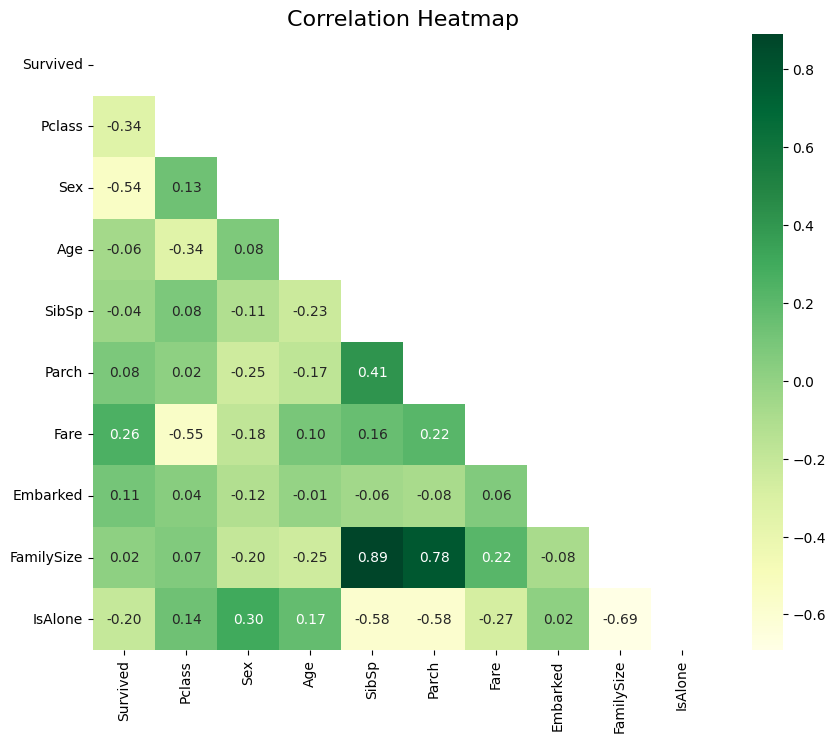

In [82]:
correlation_matrix = selected.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="YlGn", cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [83]:
X_train = np.array(df_train[['Pclass', 'Sex', 'Parch', 'Fare']])
y_train = np.array(df_train[['Survived']])

## **Model**

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'), # input
    tf.keras.layers.Dense(20, activation='relu'), # hidden 1
    tf.keras.layers.Dense(8, activation='sigmoid'), # hidden 2
    tf.keras.layers.Dense(2, activation='softmax') # output
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
result = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4031 - loss: 0.9682
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3916 - loss: 0.8533
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3932 - loss: 0.7661
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4185 - loss: 0.7065
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6216 - loss: 0.6818
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6106 - loss: 0.6661
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6038 - loss: 0.6633
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6220 - loss: 0.6524
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6321 - loss: 0.6447  
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 0.6400 
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5997 - loss: 0.6473 
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

In [86]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,070 (4.18 KB)

 Trainable params: 356 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 714 (2.79 KB)

None


## **Plot**

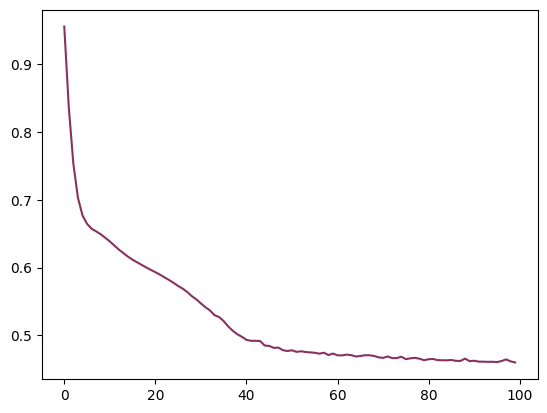

In [87]:
plt.plot(result.history['loss'], color='#873260')
plt.show()

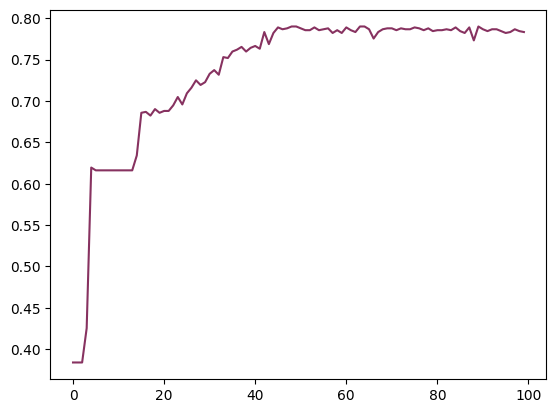

In [88]:
plt.plot(result.history['accuracy'], color='#873260')
plt.show()

## **Determine X_test and y_test**

In [89]:
X_test = np.array(df_test[['Pclass', 'Sex', 'Parch', 'Fare']])
y_test = np.array(df_target[['Survived']])

In [90]:
# y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred = np.argmax(model.predict(X_test), axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


## **Evaluation Metrics**

In [91]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

Confusion matrix

In [92]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[266   0]
 [  3 149]]


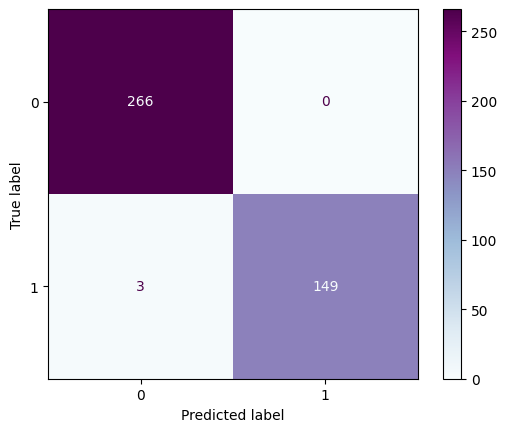

In [93]:
displiay_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
displiay_cm.plot(cmap='BuPu')
plt.show()

Accuracy and Loss

In [94]:
eval = model.evaluate(X_test, y_test)
print(f'Loss: {eval[0]}')
print(f'Accuracy: {eval[1]}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.2700  
Loss: 0.2639419734477997
Accuracy: 0.9928229451179504


Precision and Recall and F1-score

In [95]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision}")

# Calculate Recall
recall = recall_score(y_test, y_pred, average='binary')
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1-score: {f1}")

Precision: 1.0
Recall: 0.9802631578947368
F1-score: 0.9900332225913622


## Jack and Rose survival prediction

In [96]:
Jack = np.array([[3, 1, 0, 5]])
Rose = np.array([[1, 0, 0, 100]])

In [97]:
jack_pred = np.argmax(model.predict(Jack), axis=1)
rose_pred = np.argmax(model.predict(Rose), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [98]:
print(f"Jack's survival prediction: {'Survived' if jack_pred == 1 else 'Did not survive'}")
print(f"Rose's survival prediction: {'Survived' if rose_pred == 1 else 'Did not survive'}")

Jack's survival prediction: Did not survive
Rose's survival prediction: Survived


## **KNN**

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Model

In [100]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

### Predict & calculate accuracy

In [101]:
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.7799043062200957


## **Perceptron**

In [102]:
from sklearn.linear_model import Perceptron

### Perceptron model

In [103]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

### Predict & calculate accuracy

In [104]:
perceptron_pred = perceptron.predict(X_test)
perceptron_accuracy = accuracy_score(y_test, perceptron_pred)
print(f"Perceptron Accuracy: {perceptron_accuracy}")

Perceptron Accuracy: 0.3708133971291866


## Table Result

In [105]:
results = pd.DataFrame({
    'Algorithm': ['KNN', 'Perceptron', 'MLP (Multi-Layer Perceptron)'],
    'Accuracy': [knn_accuracy, perceptron_accuracy, eval[1]]
})

results

,Algorithm,Accuracy
0,KNN,0.779904
1,Perceptron,0.370813
2,MLP (Multi-Layer Perceptron),0.992823
